In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

In [2]:
fatal_killings_raw = pd.read_csv("../data/fatal_encounters_dot_org.csv",skiprows = [28622])
fatal_killings_raw.tail()

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),...,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
28616,28618,Santos Anthony Villegas,36,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/17/2020,700 Orange Street,...,Santos Anthony Villegas was being sought by po...,Pending investigation,Intentional use of deadly force,https://www.sbsun.com/2020/08/18/man-who-polic...,No,NaN,8/17/2020: Santos Anthony Villegas was being s...,NaN,28618,2020
28617,28619,Maksim Aleksandrovich Krechetov,44,Male,European-American/White,European-American/White,Not imputed,NaN,08/17/2020,600 block NE. 120th Avenue,...,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Suicide,Suicide,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandrovich Krechetov, 44...",NaN,28619,2020
28618,28620,Yulia Khort,47,Female,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/17/2020,600 block NE. 120th Avenue,...,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Murder/suicide,No,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandrovich Krechetov, 44...",NaN,28620,2020
28619,28616,Reuben,14,Male,African-American/Black,African-American/Black,Not imputed,NaN,08/18/2020,900 block Patterson Avenue,...,Deputies were following the car down Patterson...,Pending investigation,Pursuit,https://www.wfmynews2.com/article/news/local/w...,No,NaN,8/18/2020: Deputies were following the car dow...,NaN,28616,2020
28620,28621,Danny Ray Spence,33,Male,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,08/18/2020,Spring Creek Road,...,Police were seeking Danny Spence for charges t...,Pending investigation,No,https://www.wsmv.com/news/hickman_county/autho...,No,NaN,8/18/2020: Police were seeking Danny Spence fo...,NaN,28621,2020


In [3]:
#cleaning the age column

def clean_ages(age):
    # Search for opening bracket in the name followed by
    # any characters repeated any number of times
    if re.search("months$", str(age)):
        return round(float(age[:2].rstrip(" "))/12, 2)
    elif re.search("s$", str(age)):
        return float(age[:2].rstrip(" "))
    elif re.search("^[0-9]{2}-", str(age)):
        return round((float(age[:2]) + float(age[3:6]))/2, 2)
    elif re.search("^[0-9]{2}/", str(age)):
        return round((float(age[:2]) + float(age[3:6]))/2, 2)
    else:
        return float(age)
          
# Updated the city columns
fatal_killings_raw["Subject's age"] = fatal_killings_raw["Subject's age"].apply(clean_ages)
  
# Print the updated dataframe
fatal_killings_raw["Subject's age"].unique()

array([ 17.  ,  21.  ,  19.  ,  23.  ,  24.  ,  53.  ,  30.  ,  29.  ,
        55.  ,  42.  ,  41.  ,  45.  ,  20.  ,  25.  ,  22.  ,  31.  ,
        36.  ,  28.  ,  35.  ,    nan,  26.  ,  68.  ,  16.  ,  49.  ,
        27.  ,  50.  ,  44.  ,  43.  ,  38.  ,  34.  ,  32.  ,  14.  ,
        15.  ,  18.  ,  33.  ,  57.  ,   1.  ,  88.  ,  37.  ,  40.  ,
        85.  ,  48.  ,  56.  ,  52.  ,  46.  ,  63.  ,  74.  ,  60.  ,
        59.  ,  51.  ,  69.  ,  10.  ,  13.  ,  39.  ,  47.  ,  66.  ,
        79.  ,  12.  ,  11.  ,  54.  ,  65.  ,  75.  ,   6.  ,   7.  ,
         5.  ,   3.  ,  72.  ,  58.  ,  71.  ,  80.  ,  78.  ,  61.  ,
        73.  ,  67.  ,  70.  ,  77.  ,  76.  ,   8.  ,   9.  ,  64.  ,
        62.  ,   4.  ,  83.  ,   2.  ,  89.  ,  21.5 ,   1.5 ,  49.5 ,
         0.25,  84.  ,  90.  ,  81.  ,  87.  ,   0.5 ,   0.75,   0.83,
        86.  ,  92.  ,   0.17,   0.58,  82.  ,   0.67,  91.  ,  95.  ,
       101.  , 107.  ,  97.  ,  93.  ,   0.33])

In [4]:
#Fill the nulls with median of the age
fatal_killings_raw["Subject's age"].fillna(fatal_killings_raw["Subject's age"].median(), inplace = True)

In [5]:
#Question 1.1
#How does the use of force vary across age groups? - Preparing the age bins
#Create a copy of the raw dataset
fatal_killings_age_subset = fatal_killings_raw.copy()

#Rename appropriate columns in the subset
fatal_killings_age_subset.columns = fatal_killings_age_subset.columns.str.replace("'","") 
fatal_killings_age_subset.rename(columns = {"Subjects age" : "age",
                                            "Cause of death" : "cause_death",
                                            "Subjects race" : "race",
                                            "Subjects race with imputations":"race_imp",
                                            "Date (Year)":"year",
                                            "Location of death (city)":"city",
                                            "Agency responsible for death" : "police_dept",
                                            "Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS":"mental_illness_symptoms"},inplace=True)

fatal_killings_age_subset["age_bin"] = pd.cut(fatal_killings_age_subset.age, bins = [0,10,18,35,45,64,80,110],labels=["Children",
                                                                                                                      "Teenagers",
                                                                                                                      "Early_adults",
                                                                                                                      "Early_middle",
                                                                                                                      "Late_middle",
                                                                                                                      "Senior",
                                                                                                                      "Super_senior"])

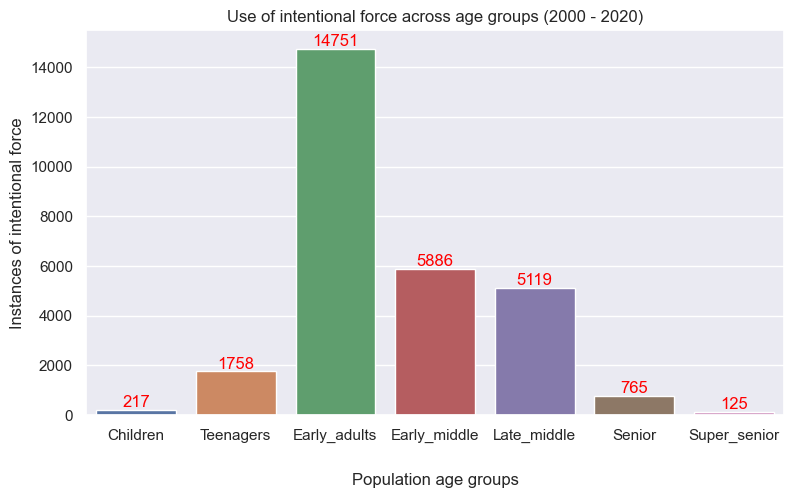

In [6]:
#Question 1.1
#How does the use of force vary across age groups? - Plotting the overall scenario

#Get the counts in a seperate dataframe
fatal_age_plot_data = fatal_killings_age_subset[["age_bin"]].value_counts().reset_index()
fatal_age_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_data.sort_values(by="age_bin",inplace=True)
fatal_age_plot_data

sns.set(rc={'figure.figsize':(9,5)})

age_plot = sns.barplot(data = fatal_age_plot_data,x = "age_bin", y = "counts").set(title = "Use of intentional force across age groups (2000 - 2020)",
                                                                                   xlabel = "Population age groups",
                                                                                   ylabel = "Instances of intentional force")
ax = plt.gca()

# Iterate through the subplot and set the value of individual bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

# Set x label position

ax.xaxis.set_label_coords(0.5, -0.15)                                                                   

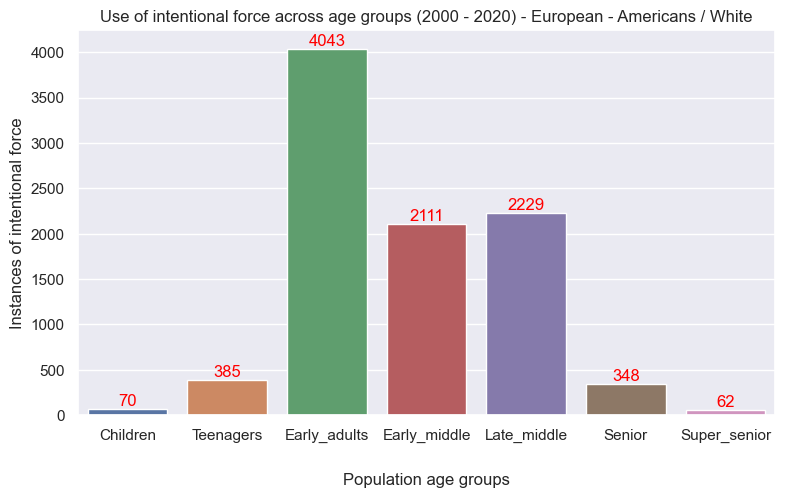

In [7]:
#Question 1.1
#How does the use of force vary across age groups for European/White American people?
fatal_age_cau = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "European-American/White"]
fatal_age_plot_cau = fatal_age_cau[["age_bin"]].value_counts().reset_index()
fatal_age_plot_cau.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_cau.sort_values(by="age_bin",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(9,5)})

age_plot = sns.barplot(data = fatal_age_plot_cau,x = "age_bin", y = "counts").set(title = "Use of intentional force across age groups (2000 - 2020) - European - Americans / White",
                                                                                   xlabel = "Population age groups",
                                                                                   ylabel = "Instances of intentional force")
ax = plt.gca()

#Iterate through the subplot and set the value of individual bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#Set x label position

ax.xaxis.set_label_coords(0.5, -0.15)                                                                    

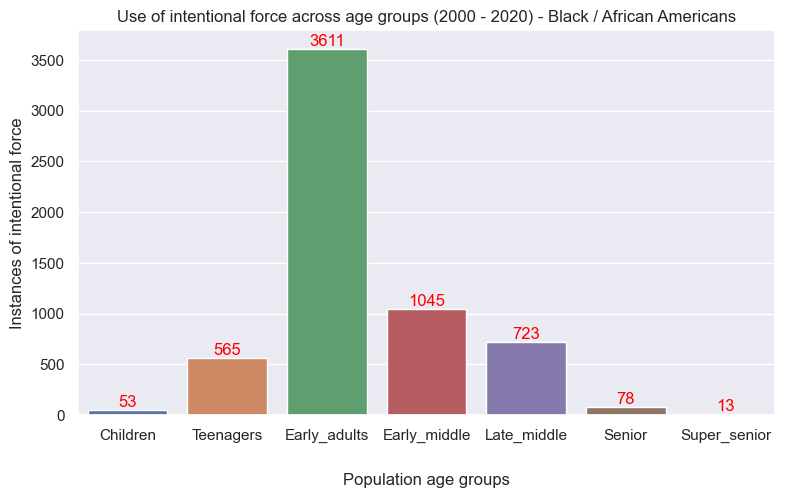

In [8]:
#Question 1.1
#How does the use of force vary across age groups for Black/African American people?
fatal_age_afr = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "African-American/Black"]
fatal_age_plot_afr = fatal_age_afr[["age_bin"]].value_counts().reset_index()
fatal_age_plot_afr.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_afr.sort_values(by="age_bin",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(9,5)})

age_plot = sns.barplot(data = fatal_age_plot_afr,x = "age_bin", y = "counts").set(title = "Use of intentional force across age groups (2000 - 2020) - Black / African Americans",
                                                                                   xlabel = "Population age groups",
                                                                                   ylabel = "Instances of intentional force")
ax = plt.gca()

#Iterate through the subplot and set the value of individual bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#Set x label position

ax.xaxis.set_label_coords(0.5, -0.15)                                                              

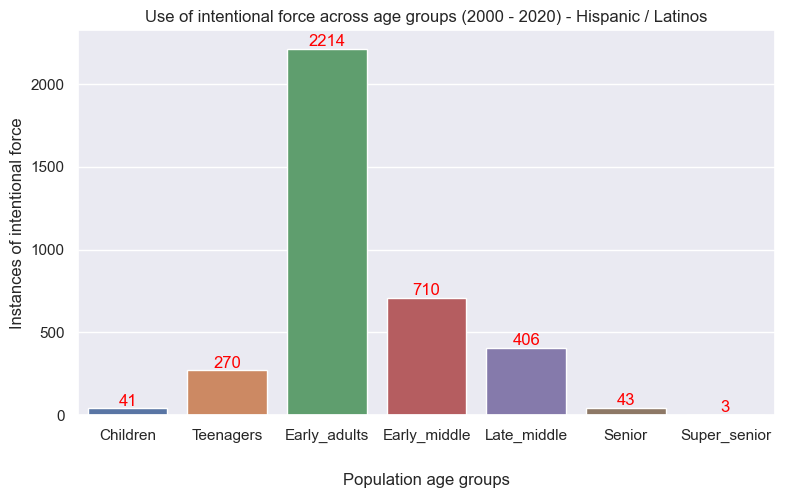

In [9]:
#Question 1.1
#How does the use of force vary across age groups for Black/African American people?
fatal_age_his = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "Hispanic/Latino"]
fatal_age_plot_his = fatal_age_his[["age_bin"]].value_counts().reset_index()
fatal_age_plot_his.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_his.sort_values(by="age_bin",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(9,5)})

age_plot = sns.barplot(data = fatal_age_plot_his,x = "age_bin", y = "counts").set(title = "Use of intentional force across age groups (2000 - 2020) - Hispanic / Latinos",
                                                                                   xlabel = "Population age groups",
                                                                                   ylabel = "Instances of intentional force")
ax = plt.gca()

#Iterate through the subplot and set the value of individual bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#Set x label position

ax.xaxis.set_label_coords(0.5, -0.15)

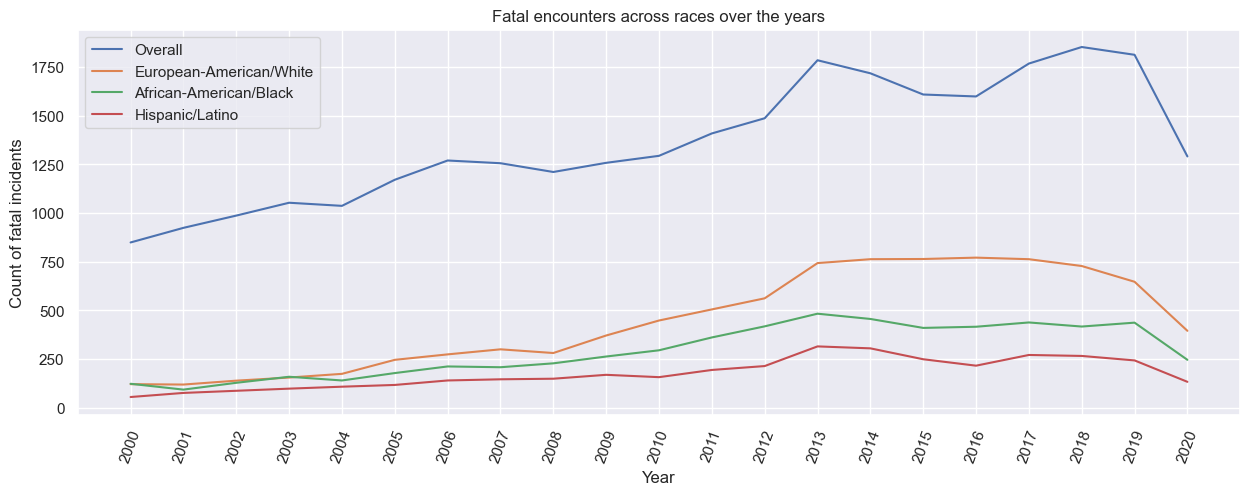

In [42]:
fatal_age_plot_ove = fatal_killings_age_subset[["year","race"]].value_counts().reset_index()
fatal_age_plot_ove = fatal_age_plot_ove[fatal_age_plot_ove["race"].isin(["European-American/White", 
                                                                         "African-American/Black", 
                                                                         "Hispanic/Latino"])]
fatal_age_plot_ove.sort_values(by = ["year","race"])
fatal_age_plot_ove.rename(columns = {0:"counts"},inplace = True)

fatal_age_line_plot_race = fatal_age_plot_ove.pivot(index = "year", columns="race",values = "counts")

fatal_age_line_plot_overall = fatal_killings_age_subset[["year"]].value_counts().reset_index()
fatal_age_line_plot_overall.rename(columns = {0:"Overall"},inplace = True)

fatal_age_line_plot_race = fatal_age_line_plot_race.merge(fatal_age_line_plot_overall,on="year")

#Plotting line plots for races
fatal_age_line_plot_race["Overall"].plot(label = "Overall")
fatal_age_line_plot_race["European-American/White"].plot(label = "European-American/White")
fatal_age_line_plot_race["African-American/Black"].plot(label = "African-American/Black")
fatal_age_line_plot_race["Hispanic/Latino"].plot(label = "Hispanic/Latino")
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Count of fatal incidents")
plt.title("Fatal encounters across races over the years")
plt.xticks(range(0,len(fatal_age_line_plot_race.year)),fatal_age_line_plot_race.year, rotation = 70)
plt.show()

Index(['Unique ID', 'Subjects name', 'age', 'Subjects gender', 'race',
       'race_imp', 'Imputation probability', 'URL of image of deceased',
       'Date of injury resulting in death (month/day/year)',
       'Location of injury (address)', 'city', 'Location of death (state)',
       'Location of death (zip code)', 'Location of death (county)',
       'Full Address', 'Latitude', 'Longitude', 'police_dept', 'cause_death',
       'A brief description of the circumstances surrounding the death',
       'Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS',
       'Intentional Use of Force (Developing)',
       'Link to news article or photo of official document',
       'mental_illness_symptoms', 'Video', 'Date&Description',
       'Unique ID formula', 'Unique identifier (redundant)', 'year',
       'age_bin'],
      dtype='object')


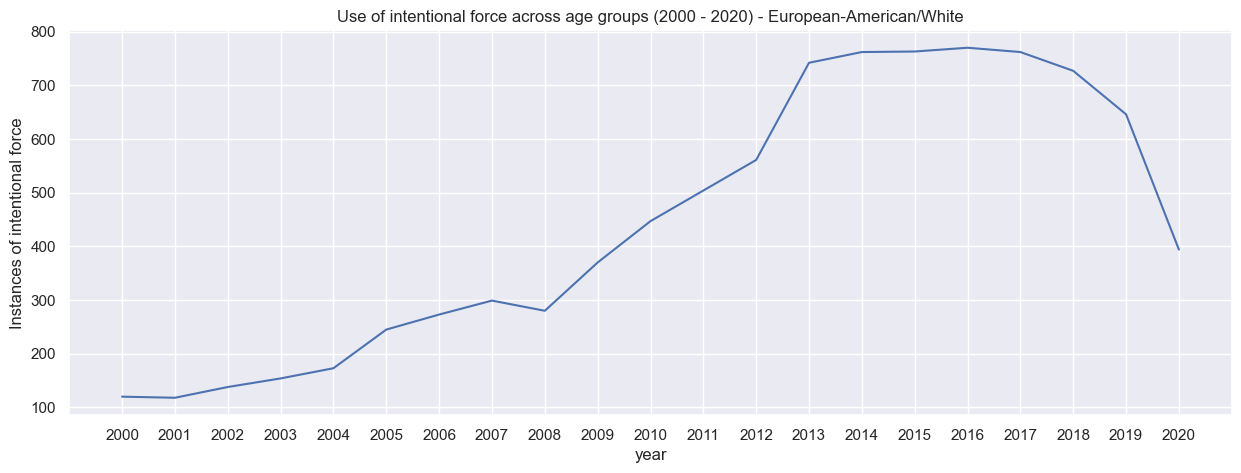

In [11]:
#How does the use of force vary across years for European / White Americans?
fatal_age_cau = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "European-American/White"]
print(fatal_age_cau.columns)
fatal_age_plot_cau = fatal_age_cau[["year"]].value_counts().reset_index()
fatal_age_plot_cau.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_cau.sort_values(by="year",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(15,5)})

age_plot = sns.lineplot(data = fatal_age_plot_cau,x = "year", y = "counts")

age_plot.set(title = "Use of intentional force across age groups (2000 - 2020) - European-American/White",
             xlabel = "year",
             ylabel = "Instances of intentional force")

ax = plt.gca()
age_plot.set_xticks(fatal_age_plot_cau.year)
plt.show()

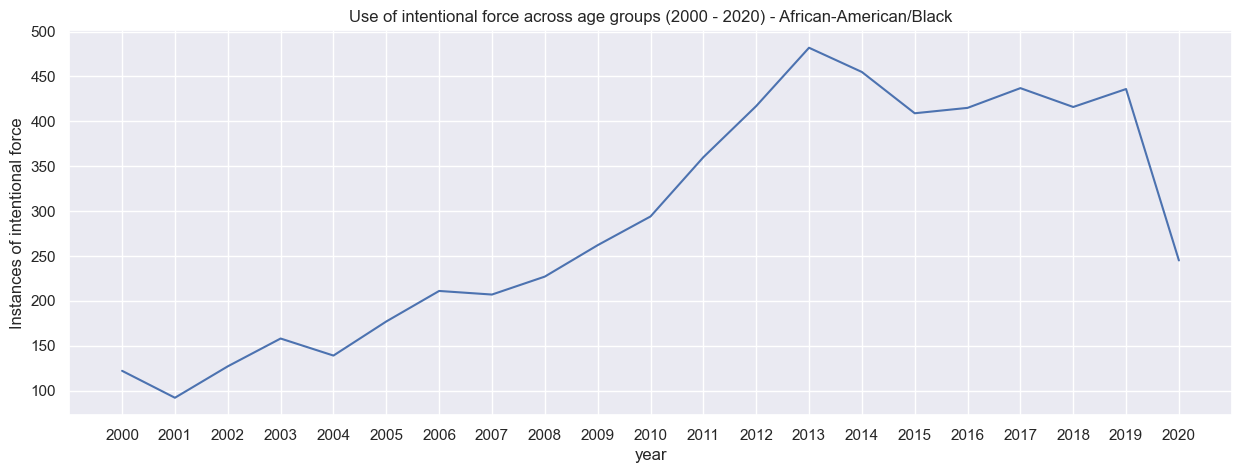

In [12]:
#How does the use of force vary across years for Blacks/African Americans?
fatal_age_afr = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "African-American/Black"]
fatal_age_plot_afr = fatal_age_afr[["year"]].value_counts().reset_index()
fatal_age_plot_afr.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_afr.sort_values(by="year",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(15,5)})

age_plot = sns.lineplot(data = fatal_age_plot_afr,x = "year", y = "counts")

age_plot.set(title = "Use of intentional force across age groups (2000 - 2020) - African-American/Black",
             xlabel = "year",
             ylabel = "Instances of intentional force")

ax = plt.gca()
age_plot.set_xticks(fatal_age_plot_afr.year)
plt.show()

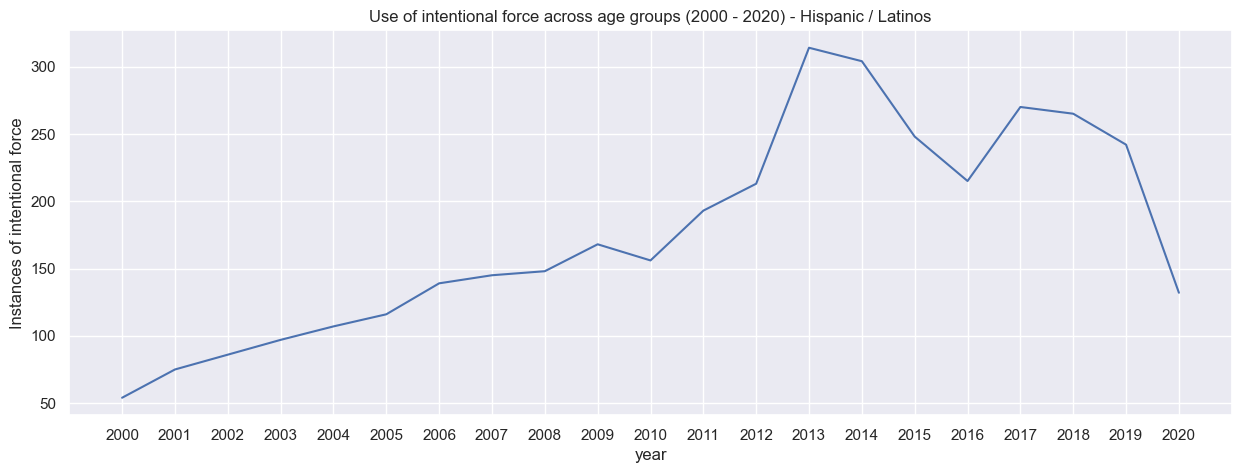

In [13]:
#How does the use of force vary across years for Hispanic/Latinos?
fatal_age_his = fatal_killings_age_subset[fatal_killings_age_subset["race"] == "Hispanic/Latino"]
fatal_age_plot_his = fatal_age_his[["year"]].value_counts().reset_index()
fatal_age_plot_his.rename(columns={0:"counts"},inplace=True)
fatal_age_plot_his.sort_values(by="year",inplace=True)

#Plot data for European / American people
sns.set(rc={'figure.figsize':(15,5)})

age_plot = sns.lineplot(data = fatal_age_plot_his,x = "year", y = "counts")

age_plot.set(title = "Use of intentional force across age groups (2000 - 2020) - Hispanic / Latinos",
             xlabel = "year",
             ylabel = "Instances of intentional force")

ax = plt.gca()
age_plot.set_xticks(fatal_age_plot_his.year)
plt.show()

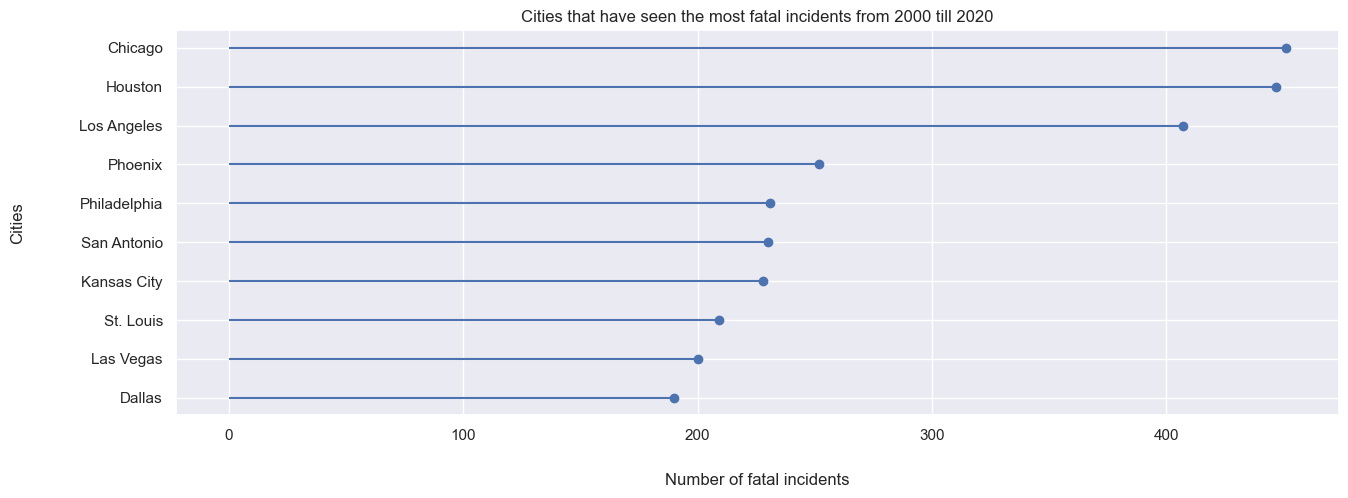

In [14]:
#Question1.4 - Which cities are at the helm of most killings?

fatal_city_plot_data = fatal_killings_age_subset.copy()
fatal_city_plot_data = fatal_city_plot_data[["city"]].value_counts().reset_index()
fatal_city_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_city_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_city_plot_data = fatal_city_plot_data[0:10]
fatal_city_plot_data.sort_values(by="counts",ascending = True,inplace=True)

fig, ax = plt.subplots()

plt.hlines(y = fatal_city_plot_data.city,xmin = 0, xmax = fatal_city_plot_data.counts)
plt.scatter(fatal_city_plot_data.counts,range(0,len(fatal_city_plot_data.city)))
plt.title("Cities that have seen the most fatal incidents from 2000 till 2020")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Cities")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.13, 0.5)
plt.show()

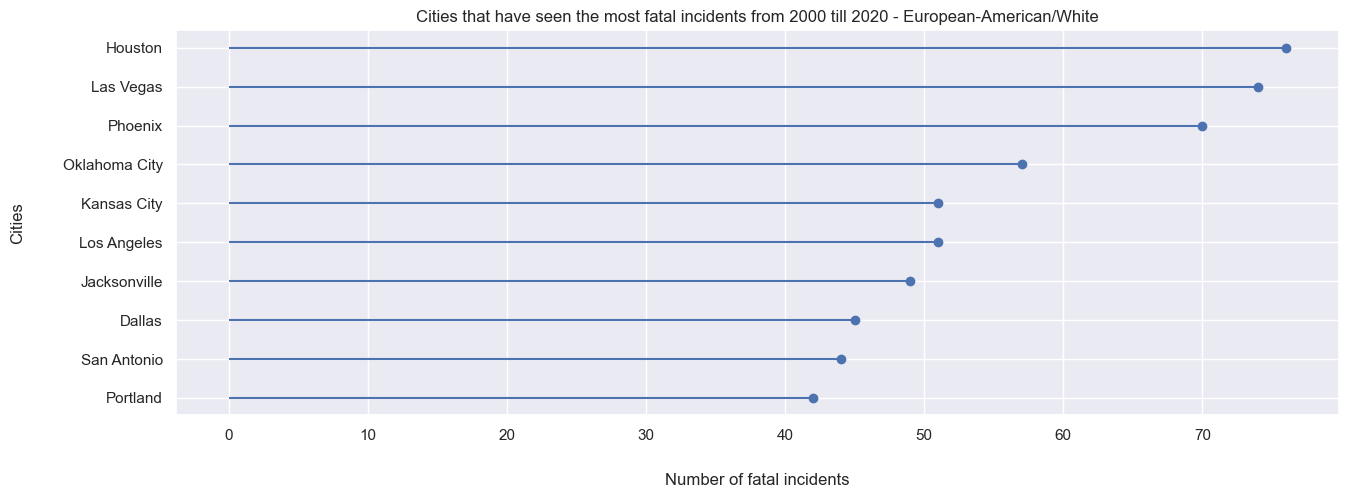

In [15]:
#Question1.4.1 - Which cities are at the helm of most killings for European American / Whites?

fatal_city_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="European-American/White"]
fatal_city_plot_data = fatal_city_plot_data[["city"]].value_counts().reset_index()
fatal_city_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_city_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_city_plot_data = fatal_city_plot_data[0:10]
fatal_city_plot_data.sort_values(by="counts",ascending = True,inplace=True)

fig, ax = plt.subplots()

plt.hlines(y = fatal_city_plot_data.city,xmin = 0, xmax = fatal_city_plot_data.counts)
plt.scatter(fatal_city_plot_data.counts,range(0,len(fatal_city_plot_data.city)))
plt.title("Cities that have seen the most fatal incidents from 2000 till 2020 - European-American/White")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Cities")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.13, 0.5)
plt.show()

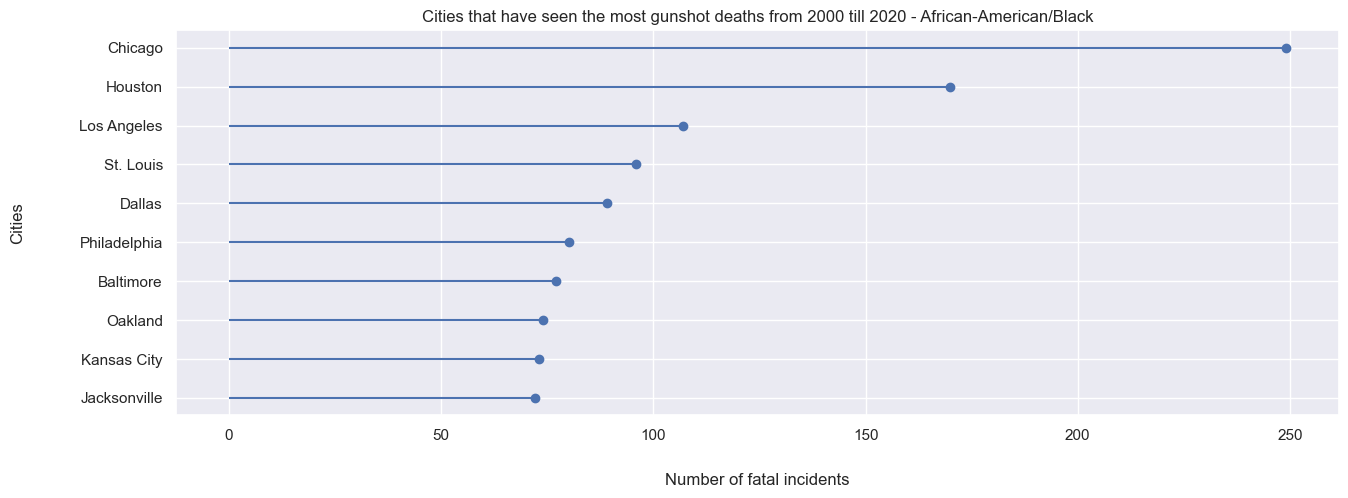

In [16]:
#Question1.4.2 - Which cities are at the helm of most killings for African-American/Black?

fatal_city_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="African-American/Black"]
fatal_city_plot_data = fatal_city_plot_data[["city"]].value_counts().reset_index()
fatal_city_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_city_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_city_plot_data = fatal_city_plot_data[0:10]
fatal_city_plot_data.sort_values(by="counts",ascending = True,inplace=True)

fig, ax = plt.subplots()

plt.hlines(y = fatal_city_plot_data.city,xmin = 0, xmax = fatal_city_plot_data.counts)
plt.scatter(fatal_city_plot_data.counts,range(0,len(fatal_city_plot_data.city)))
plt.title("Cities that have seen the most fatal deaths from 2000 till 2020 - African-American/Black")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Cities")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.13, 0.5)
plt.show()

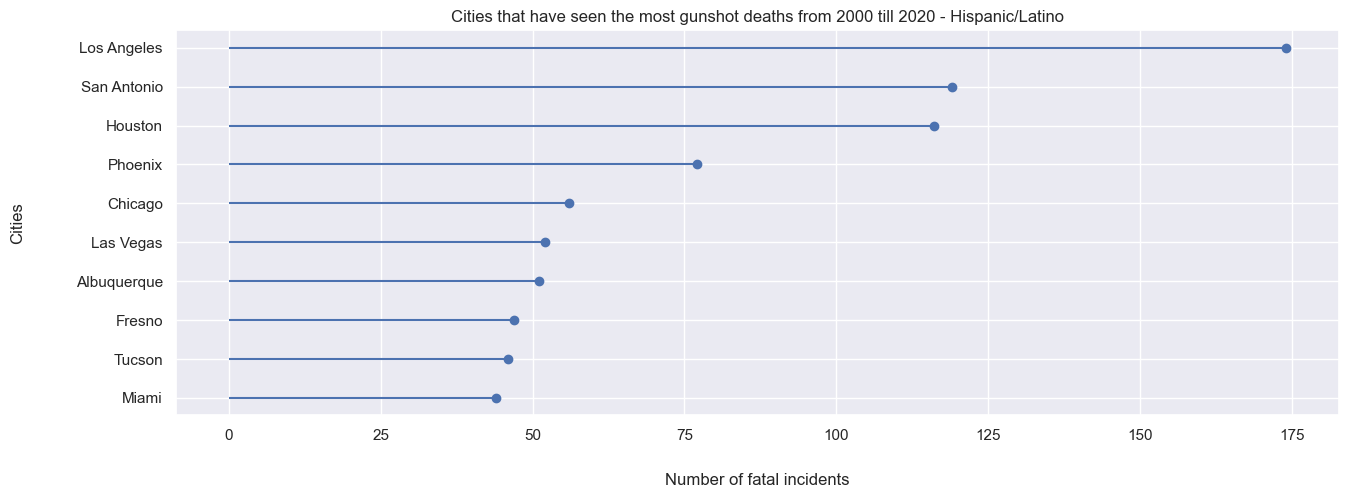

In [17]:
#Question1.4.3 - Which cities are at the helm of most killings for European American / Whites?

fatal_city_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="Hispanic/Latino"]
fatal_city_plot_data = fatal_city_plot_data[["city"]].value_counts().reset_index()
fatal_city_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_city_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_city_plot_data = fatal_city_plot_data[0:10]
fatal_city_plot_data.sort_values(by="counts",ascending = True,inplace=True)

fig, ax = plt.subplots()

plt.hlines(y = fatal_city_plot_data.city,xmin = 0, xmax = fatal_city_plot_data.counts)
plt.scatter(fatal_city_plot_data.counts,range(0,len(fatal_city_plot_data.city)))
plt.title("Cities that have seen the most gunshot deaths from 2000 till 2020 - Hispanic/Latino")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Cities")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.13, 0.5)
plt.show()

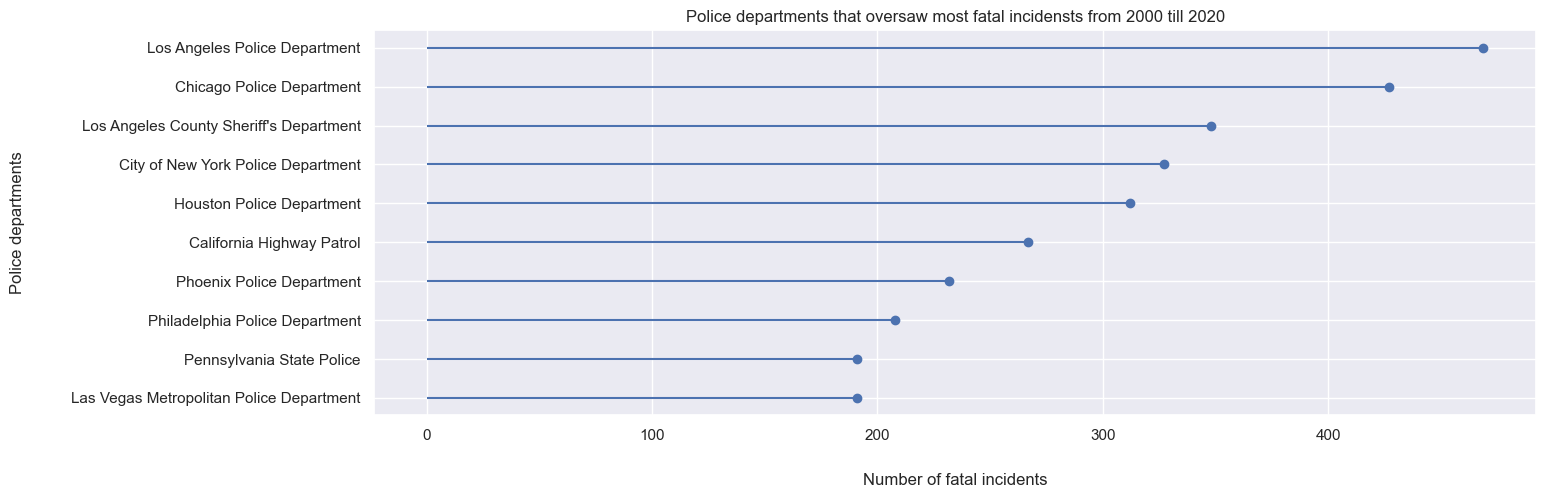

In [38]:
#Question1.5 - Which police departments are at the helm of most killings?

fatal_pd_plot_data = fatal_killings_age_subset.copy()
fatal_pd_plot_data = fatal_pd_plot_data[["police_dept"]].value_counts().reset_index()
fatal_pd_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_pd_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_pd_plot_data = fatal_pd_plot_data[0:10]
fatal_pd_plot_data.sort_values(by="counts",ascending = True,inplace=True)
fatal_pd_plot_data

fig, ax = plt.subplots()

plt.hlines(y = fatal_pd_plot_data.police_dept,xmin = 0, xmax = fatal_pd_plot_data.counts)
plt.scatter(fatal_pd_plot_data.counts,range(0,len(fatal_pd_plot_data.police_dept)))
plt.title("Police departments that oversaw most fatal incidensts from 2000 till 2020")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Police departments")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.30, 0.5)
plt.show()

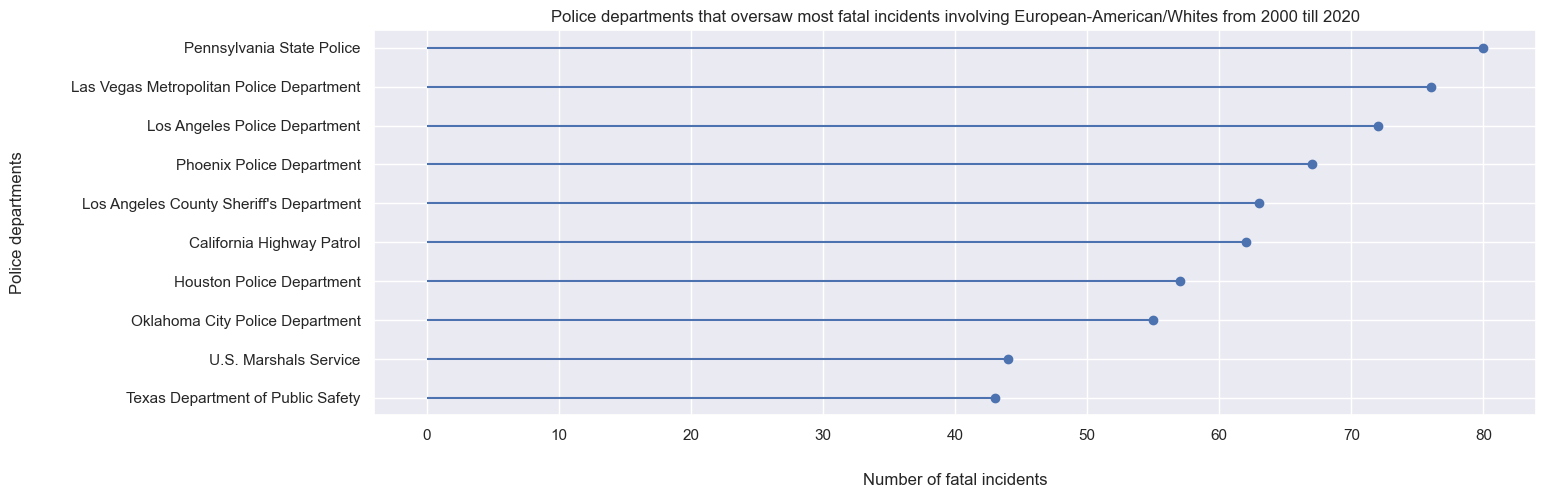

In [39]:
#Question1.5.1 - Which police departments are at the helm of most killings of European-American / Whites?

fatal_pd_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="European-American/White"]
fatal_pd_plot_data = fatal_pd_plot_data[["police_dept"]].value_counts().reset_index()
fatal_pd_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_pd_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_pd_plot_data = fatal_pd_plot_data[0:10]
fatal_pd_plot_data.sort_values(by="counts",ascending = True,inplace=True)
fatal_pd_plot_data

fig, ax = plt.subplots()

plt.hlines(y = fatal_pd_plot_data.police_dept,xmin = 0, xmax = fatal_pd_plot_data.counts)
plt.scatter(fatal_pd_plot_data.counts,range(0,len(fatal_pd_plot_data.police_dept)))
plt.title("Police departments that oversaw most fatal incidents involving European-American/Whites from 2000 till 2020")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Police departments")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.30, 0.5)
plt.show()

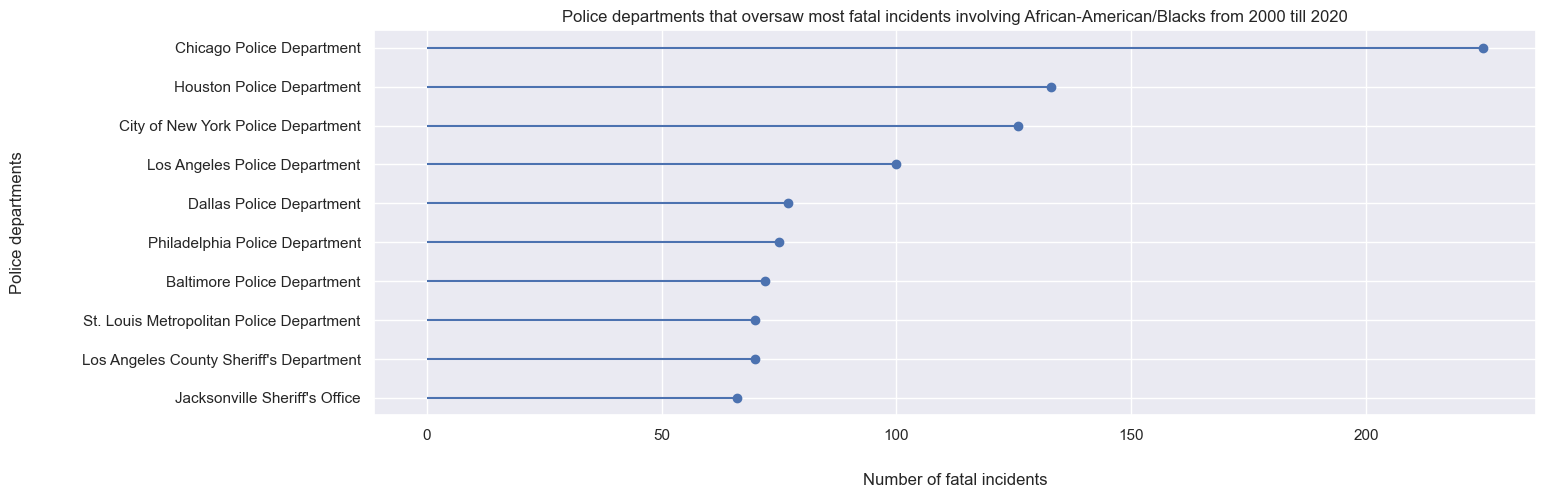

In [41]:
#Question1.5.2 - Which police departments are at the helm of most killings of European-American / Whites?
fatal_pd_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="African-American/Black"]
fatal_pd_plot_data = fatal_pd_plot_data[["police_dept"]].value_counts().reset_index()
fatal_pd_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_pd_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_pd_plot_data = fatal_pd_plot_data[0:10]
fatal_pd_plot_data.sort_values(by="counts",ascending = True,inplace=True)
fatal_pd_plot_data

fig, ax = plt.subplots()

plt.hlines(y = fatal_pd_plot_data.police_dept,xmin = 0, xmax = fatal_pd_plot_data.counts)
plt.scatter(fatal_pd_plot_data.counts,range(0,len(fatal_pd_plot_data.police_dept)))
plt.title("Police departments that oversaw most fatal incidents involving African-American/Blacks from 2000 till 2020")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Police departments")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.30, 0.5)
plt.show()

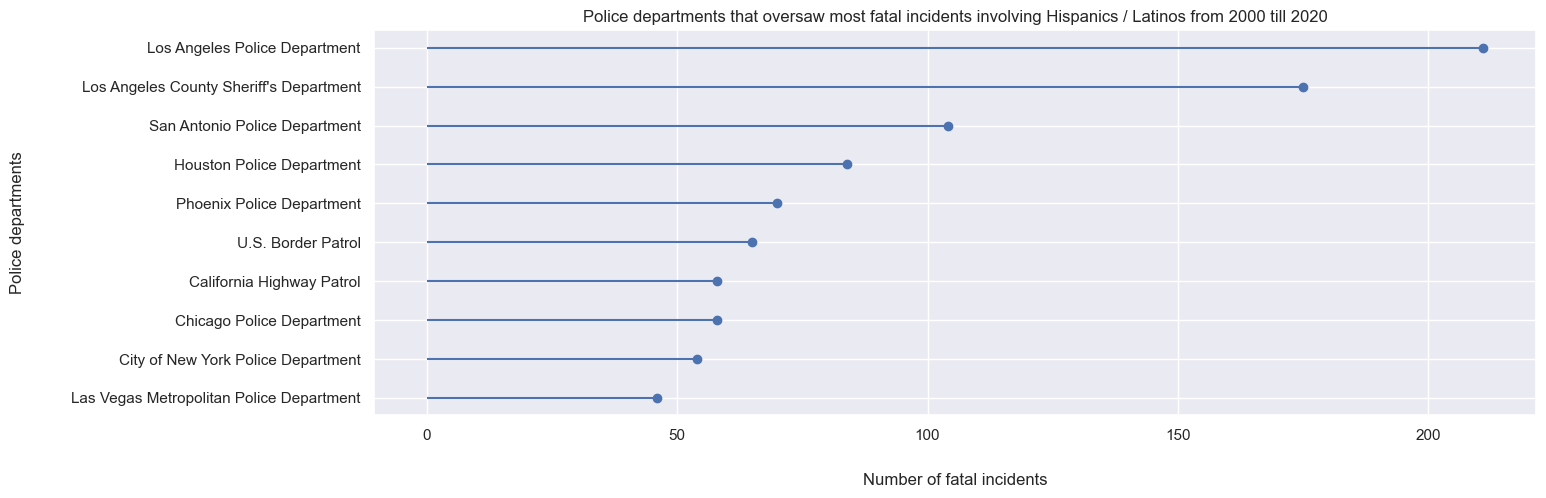

In [43]:
#Question1.5.2 - Which police departments are at the helm of most killings of European-American / Whites?
fatal_pd_plot_data = fatal_killings_age_subset[fatal_killings_age_subset["race"]=="Hispanic/Latino"]
fatal_pd_plot_data = fatal_pd_plot_data[["police_dept"]].value_counts().reset_index()
fatal_pd_plot_data.rename(columns={0:"counts"},inplace=True)
fatal_pd_plot_data.sort_values(by="counts",ascending = False,inplace=True)
fatal_pd_plot_data = fatal_pd_plot_data[0:10]
fatal_pd_plot_data.sort_values(by="counts",ascending = True,inplace=True)
fatal_pd_plot_data

fig, ax = plt.subplots()

plt.hlines(y = fatal_pd_plot_data.police_dept,xmin = 0, xmax = fatal_pd_plot_data.counts)
plt.scatter(fatal_pd_plot_data.counts,range(0,len(fatal_pd_plot_data.police_dept)))
plt.title("Police departments that oversaw most fatal incidents involving Hispanics / Latinos from 2000 till 2020")
plt.xlabel("Number of fatal incidents")
plt.ylabel("Police departments")
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.30, 0.5)
plt.show()

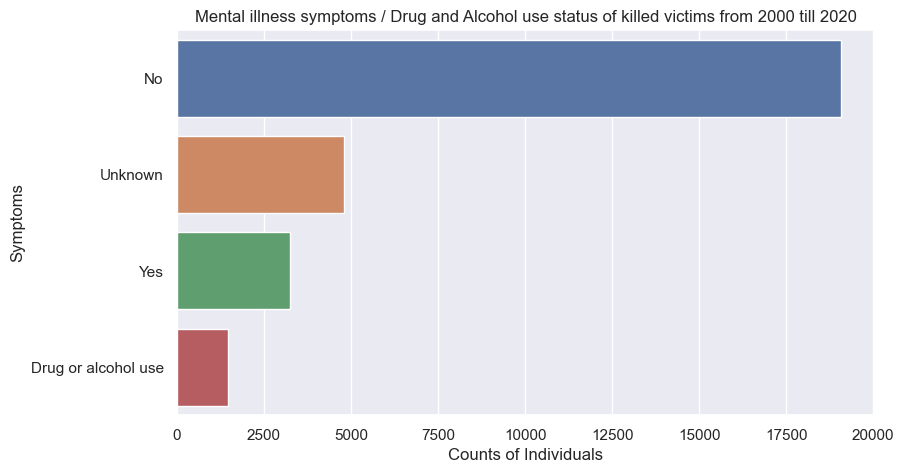

In [44]:
#Question-2.2 - Did the victims have any mental illness symptoms / Drug and alcohol abuse?
fatal_killings_age_subset["mental_illness_symptoms"] = fatal_killings_age_subset["mental_illness_symptoms"].fillna("Unknown")
fatal_ms_plot_ove = fatal_killings_age_subset[["mental_illness_symptoms"]].value_counts().reset_index()
fatal_ms_plot_ove.rename(columns={0:"counts"},inplace=True)
fatal_ms_plot_ove.sort_values(by="counts",ascending = False,inplace=True)

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(data=fatal_ms_plot_ove, x="counts", y="mental_illness_symptoms").set(title = "Mental illness symptoms / Drug and Alcohol use status of killed victims from 2000 till 2020",
                                                                                 xlabel = "Counts of Individuals",
                                                                                 ylabel = "Symptoms")
plt.show()